In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats,integrate
from scipy.optimize import minimize_scalar

%precision 3
%matplotlib inline

In [2]:
# 그래프에서 선의 종류
linestyles = ['-', '--', ':']

In [3]:
def E( X, g = lambda x: x):
    x_range, f = X
    def integrand ( x ):
        return g( x ) * f ( x )

    return integrate.quad ( integrand, -np.inf, np.inf ) [ 0 ]                     

In [4]:
def V( X, g = lambda x: x):
    x_range, f = X
    mean = E( X, g)
    def integrand ( x ):
        return  (g( x ) - mean )**2 * f (x )
    return integrate.quad ( integrand, -np.inf, np.inf ) [ 0 ]   

In [5]:
def check_prob (X):
    x_range , f= X

    f_min = minimize_scalar( f ).fun
    assert f_min >=0 , ' 확률함수가 마이너스 값을 가짐'
    prob_sum = np.round ( integrate.quad ( f, -np.inf, np.inf) [0],6)
    assert prob_sum == 1, f'확률의 합이 1이 아닌 다음의 값임:{prob_sum}'
    print ( f'expected value {E(X):.3f}')
    print ( f'variance { V(X):.3f}')


In [6]:
def plot_prob( X , x_min, x_max ):
    x_range, f = X
    def F(x):
        return integrate.quad ( f, -np.inf, x) [0]

    xs = np.linspace (x_min, x_max, 100)

    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)

    ax.plot ( xs, [ f(x) for x in xs],
              label = 'f(x)', color = 'gray')
    ax.plot ( xs, [ F(x) for x in xs],
              label = 'F(x)', ls= '--' , color = 'red')
    
    ax.legend()
    plt.show()

In [7]:
# 정규분포

def N (mu, sigma):
    x_range = [ -np.inf, np.inf]
    def f(x):
        return 1 /np.sqrt (2 * np.pi * sigma**2) *\
                    np.exp( -(x - mu)**2 / ( 2 * sigma **2))
    return  x_range, f

In [8]:
# N( 2, 0.5^2)를 따르는 확률변수 X

mu, sigma = 2, 0.5
X = N(mu, sigma)

expected value 2.000
variance 0.250


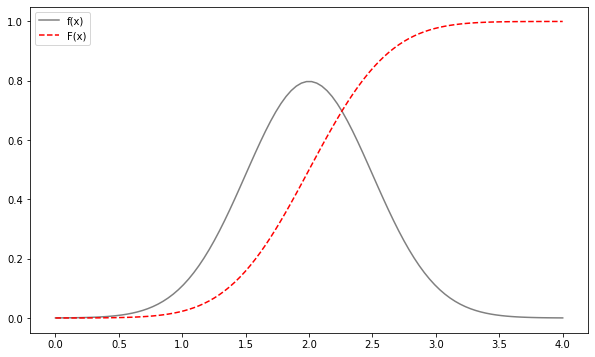

In [9]:
check_prob(X)
plot_prob ( X, 0, 4)

In [10]:
rv = stats.norm ( 2, 0.5)

rv.mean() , rv.var()

(2.000, 0.250)

In [11]:
# 밀도함수
rv.pdf(2)

0.798

In [12]:
rv.cdf(2)

0.500

In [13]:
# P( X <=x ) 를 계산하는 cdf(x) method
rv.cdf (1.7)

0.274

In [14]:
rv.pdf(1.7)

0.666

In [15]:
# 상위 100 알파 %점 
# P ( X >=x ) = alpha

rv.isf(0.1)

2.641

In [16]:
rv.interval (0.9)

(1.178, 2.822)

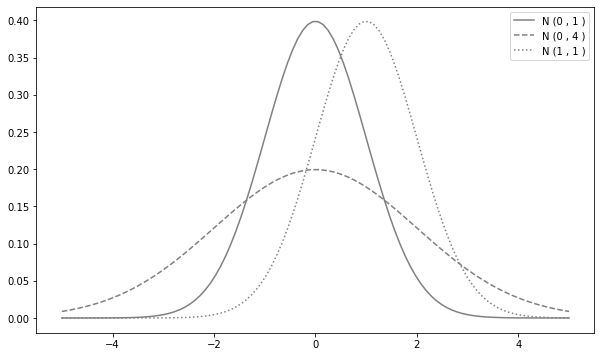

In [17]:
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)

    xs = np.linspace ( -5, 5, 100)
    params = [ (0,1), (0,2), (1,1)]
    for param, ls in zip( params, linestyles):
        mu, sigma = param
        rv = stats.norm ( mu, sigma)
        ax.plot ( xs, rv.pdf (xs),
                 label = f'N ({mu} , { sigma**2} )', ls=ls, color ='gray')
    ax.legend()
    
    plt.show()

In [18]:
#정규분포의 표본평균 분포

mean = 1
var = 2

rv = stats.norm ( mean, np.sqrt(var))

n =10
sample_size = int (1e5)
Xs_sample = rv.rvs ( ( n, sample_size ))
sample_mean = np.mean (Xs_sample, axis=0)

np.mean (sample_mean) , np.var (sample_mean)

(1.000, 0.200)

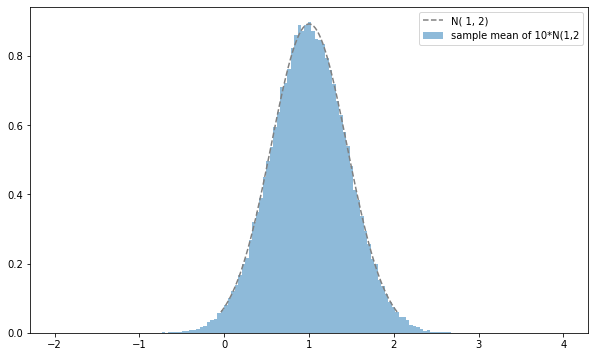

In [19]:
#정규분포의 표본평균

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

rv_true = stats.norm ( mean , np.sqrt (var/n))
xs = np.linspace ( rv_true.isf (0.99) , rv_true.isf (0.01), 100 )

ax.hist ( sample_mean, bins = 100, 
        density = True, alpha = 0.5, label = 'sample mean of 10*N(1,2')
ax.plot ( xs, rv_true.pdf (xs),
        label = 'N( 1, 2) ', ls= '--', color ='gray')
ax.legend()
ax.set_xlim(rv.isf(0.99), rv.isf(0.01))
plt.show()

In [20]:
#v포아송 분포의 표본평균 분포

l = 3
rv = stats.poisson(l)

n =10
sample_size = int (1e5)
Xs_sample = rv.rvs ( ( n, sample_size ))
sample_mean = np.mean (Xs_sample, axis=0)

np.mean (sample_mean) , np.var (sample_mean)

(2.998, 0.302)

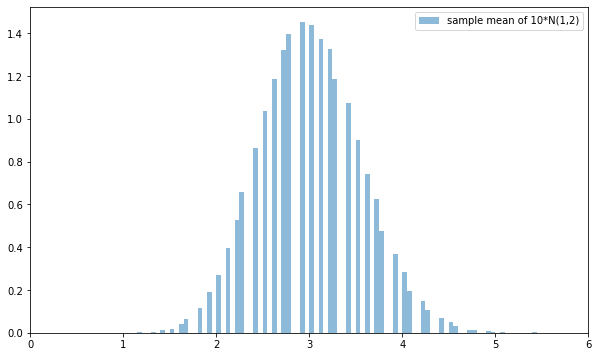

In [21]:
#v포아송 분포의 표본평균 분포

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.hist ( sample_mean, bins = 100, 
        density = True, alpha = 0.5, label = 'sample mean of 10*N(1,2)')

ax.legend()
ax.set_xlim( 0, 6)
plt.show()
# 포아송 분포의 표본분포는 근사적으로 정규분포를 따름

In [22]:
#중심극한정리

l = 3
rv = stats.poisson(l)

n =10000
sample_size = 10000
Xs_sample = rv.rvs ( ( n, sample_size ))
sample_mean = np.mean (Xs_sample, axis=0)

rv_true = stats.norm ( l, np.sqrt( 1/n ))
xs = np.linspace (rv_true.isf(0.999), rv_true.isf (0.001), 100)

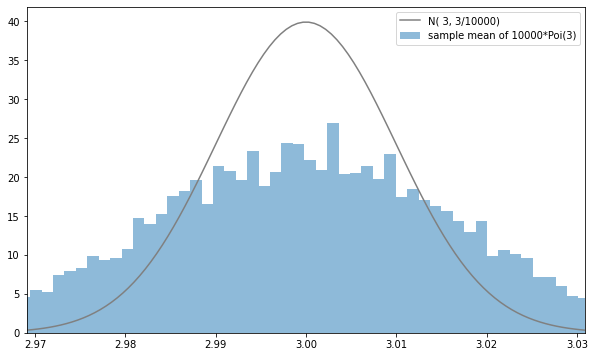

In [23]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.hist ( sample_mean, bins = 100, 
        density = True, alpha = 0.5, label = 'sample mean of 10000*Poi(3)')
ax.plot ( xs, rv_true.pdf (xs),
        label = 'N( 3, 3/10000) ', color ='gray')

ax.legend()
ax.set_xlim (rv_true.isf(0.999), rv_true.isf (0.001) )
plt.show()

### 정규분포 형태에 가까워지고 있어야 함... ㅠㅠ;;;

In [ ]:
# 책의 코드 (from Github)
#https://github.com/ghmagazine/python_stat_sample/blob/master/notebook/chap09.ipynb

l = 3
rv = stats.poisson(l)

n = 10000
sample_size = 10000
Xs_sample = rv.rvs((n, sample_size))
sample_mean = np.mean(Xs_sample, axis=0)

rv_true = stats.norm(l, np.sqrt(l/n))
xs = np.linspace(rv_true.isf(0.999), rv_true.isf(0.001), 100)


In [ ]:
# 책의 코드 (from Github)
#https://github.com/ghmagazine/python_stat_sample/blob/master/notebook/chap09.ipynb

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.hist(sample_mean, bins=100, density=True,
        alpha=0.5, label='10000個のPoi(3)の標本平均')
ax.plot(xs, rv_true.pdf(xs), label='N(3, 3/10000)', color='gray')

ax.legend()
ax.set_xlim(rv_true.isf(0.999), rv_true.isf(0.001))
plt.show()